## Important Steps in a Typical Data Science Study
- Loading the related dataset
- Exploring the data with pandas and visualizations
- Transforming data
- Splitting the data into training, validation (optional) and testing 
- Creating the model
- Training the model
- Testing the model
- Tuning the model and evaluating its accuracy
- Making predictions on live data that the model hasn’t seen before

### Case Study: Classification with k-Nearest Neighbors
#### Problem: Pumpkin Seed Classification
- The goal is to predict which class does a seed belongs to. These classes reflect the type of pumpkin seeds.
- Total number of classes - There are two important types of seeds, i.e., “Ürgüp Sivrisi” and “Çerçevelik”. So, we have two number of classes.
#### Relevant Dataset: A scientific study was done using the dataset available at https://www.muratkoklu.com/datasets/ by authors in KOKLU, M., SARIGIL, S., & OZBEK, O. (2021). The use of machine learning methods in classification of pumpkin seeds (Cucurbita pepo L.). Genetic Resources and Crop Evolution, 68(7), 2713-2726. Doi: https://doi.org/10.1007/s10722-021-01226-0
#### Choice of Model: k-Nearest Neighbors

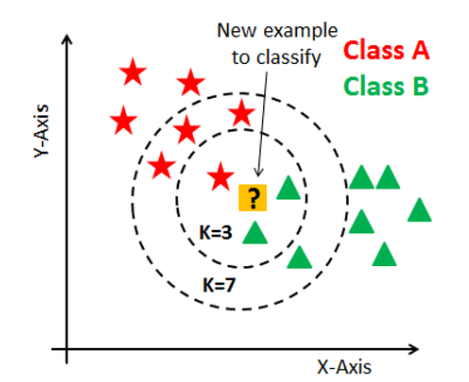

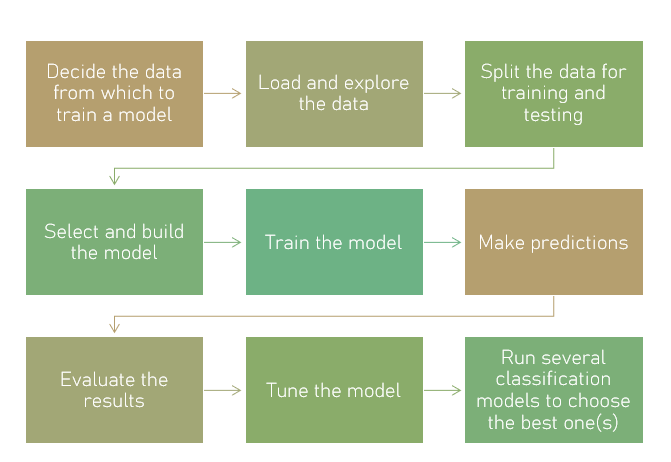

##### Import all the necessary libraries and load the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC

In [2]:
seed_data = pd.read_excel('C:\\Users\\smbtk\\OneDrive - University of Missouri\\' \
                          + 'CMP_SCI_4200\\Fall_2023\\Machine Learning Survey\\' \
                          + 'Pumpkin_Seeds_Dataset.xlsx')

##### Questions to think about ....
- What does a typical datapoint look like?
- What is the size of my data?
- Is my data balanced?
- Are there any missing values?

In [3]:
seed_data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [4]:
seed_data.iloc[0]

Area                      56276
Perimeter               888.242
Major_Axis_Length      326.1485
Minor_Axis_Length      220.2388
Convex_Area               56831
Equiv_Diameter         267.6805
Eccentricity             0.7376
Solidity                 0.9902
Extent                   0.7453
Roundness                0.8963
Aspect_Ration            1.4809
Compactness              0.8207
Class                Çerçevelik
Name: 0, dtype: object

In [5]:
seed_data.shape

(2500, 13)

In [6]:
seed_data.Class.value_counts()

Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: Class, dtype: int64

In [7]:
seed_data.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

#### Data Cleaning
##### Questions to think about ....
- Do I need to change any attribute names to make them relatable?
- Do I need to encode my nonnumerical features?
- Do I need to handle any missing values?
- Do I need to handle imbalanced data?
- Are there any duplicates in my data?

In [8]:
seed_data.duplicated().sum()

0

#### Exploratory Analysis
##### Questions to think about ....
- What are the predictors and target variables?
- How are the attributes distributed?
- How are these attributes related to each other?
- Do I need to normalize my data?

In [9]:
seed_data.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [10]:
label_encoder = preprocessing.LabelEncoder()
seed_data['Class'] = label_encoder.fit_transform(seed_data['Class'])

In [11]:
sample_df = seed_data.sample(frac=0.1, random_state=17)

In [12]:
sample_df.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')

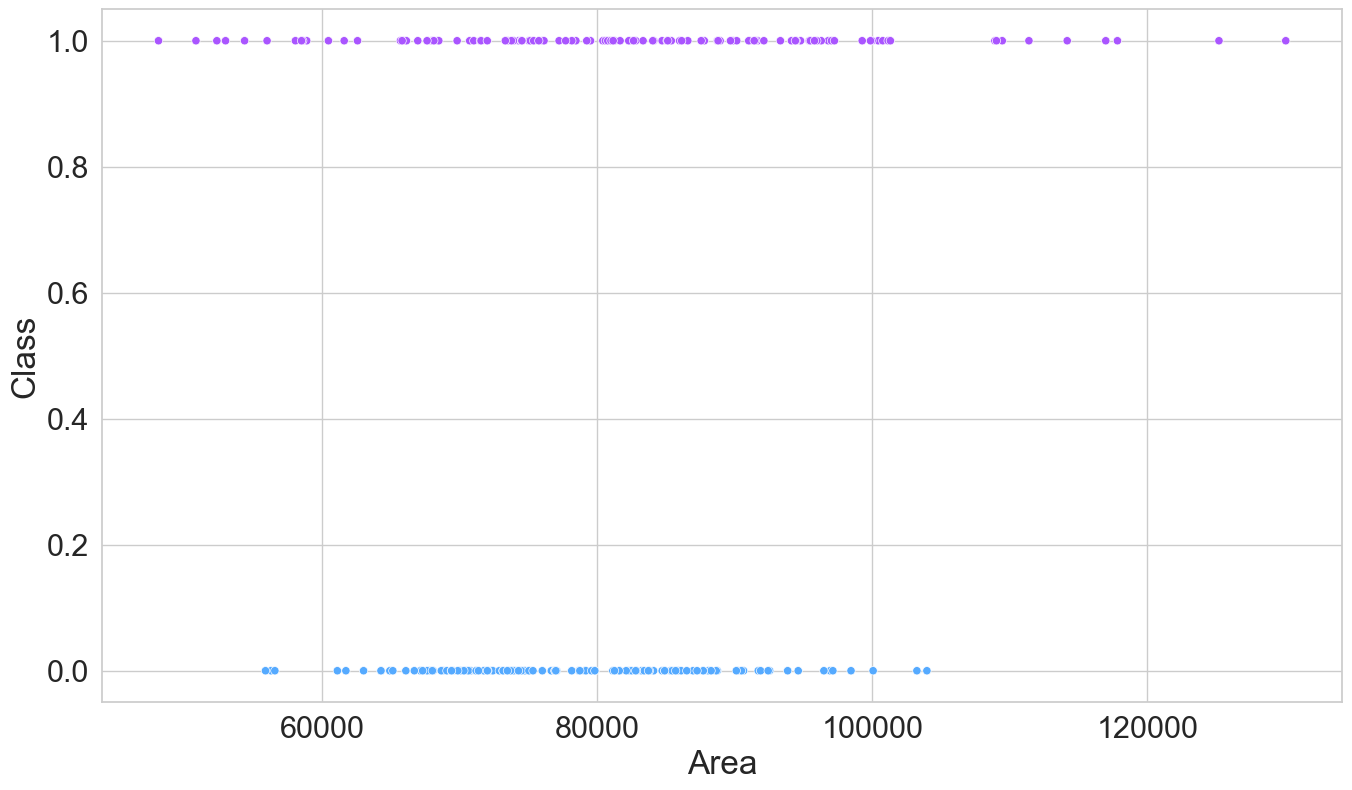

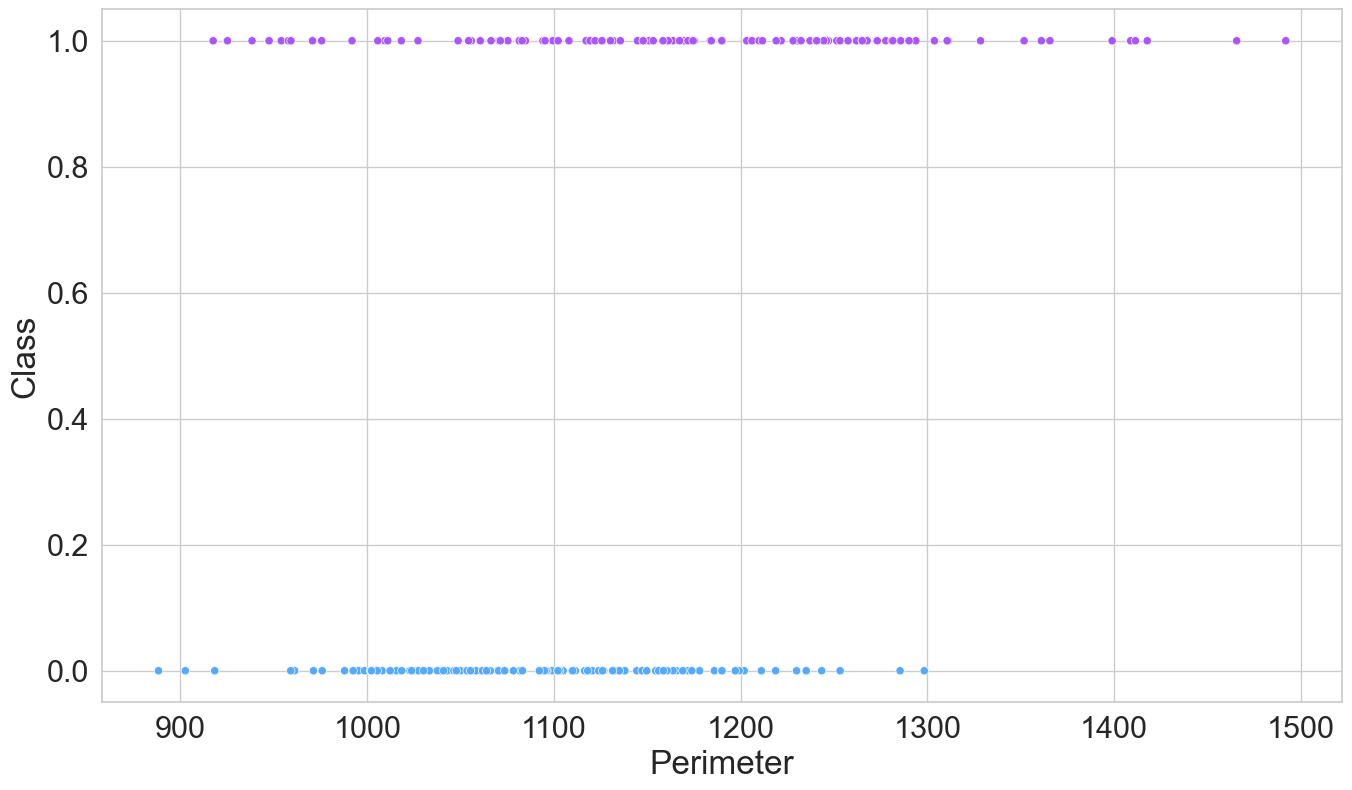

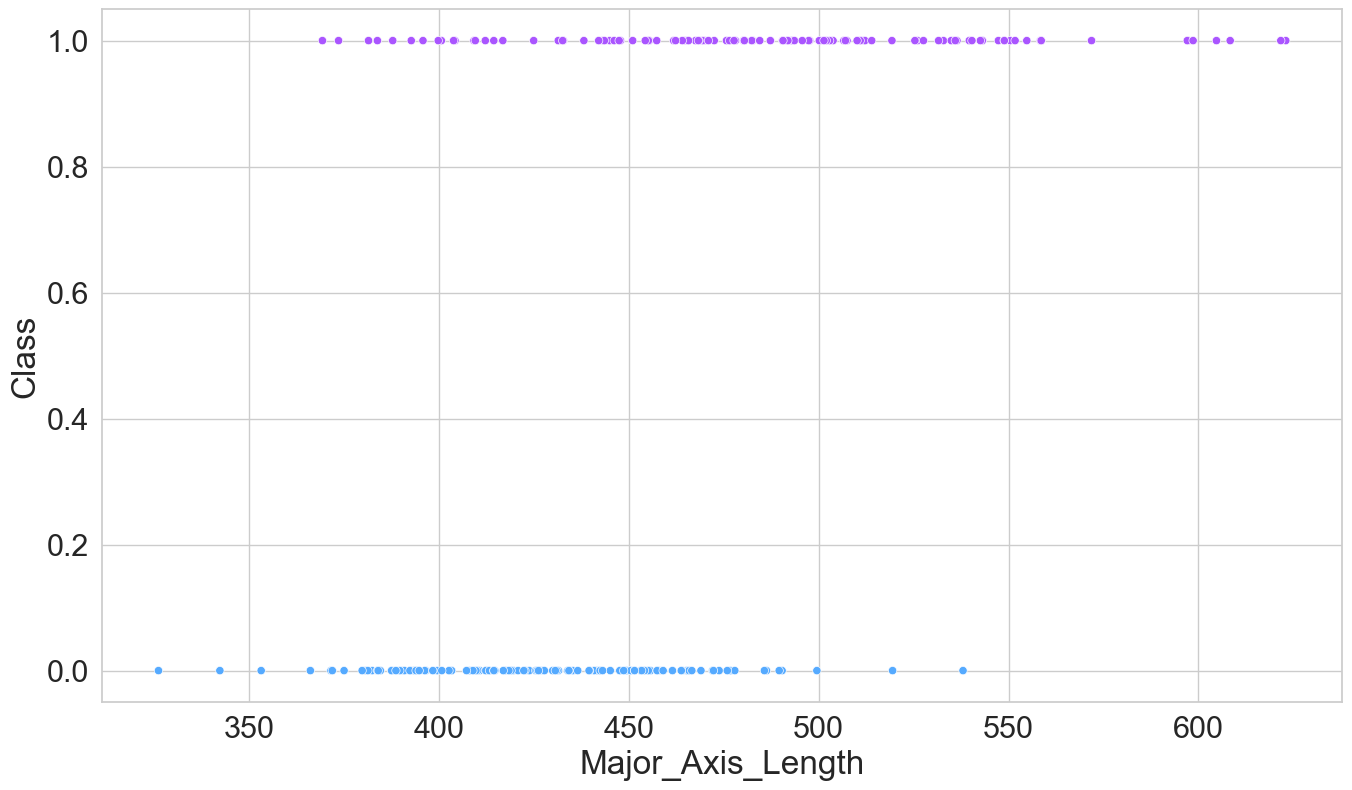

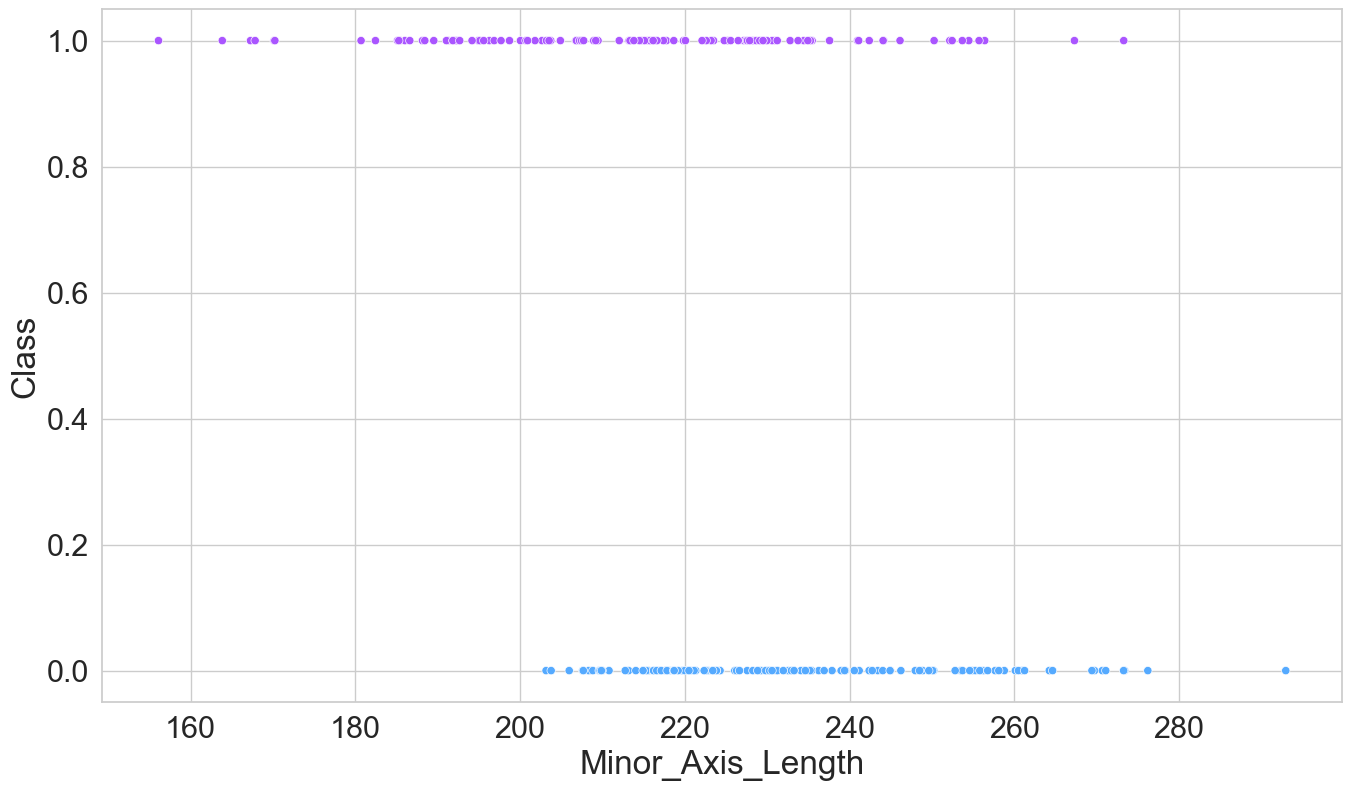

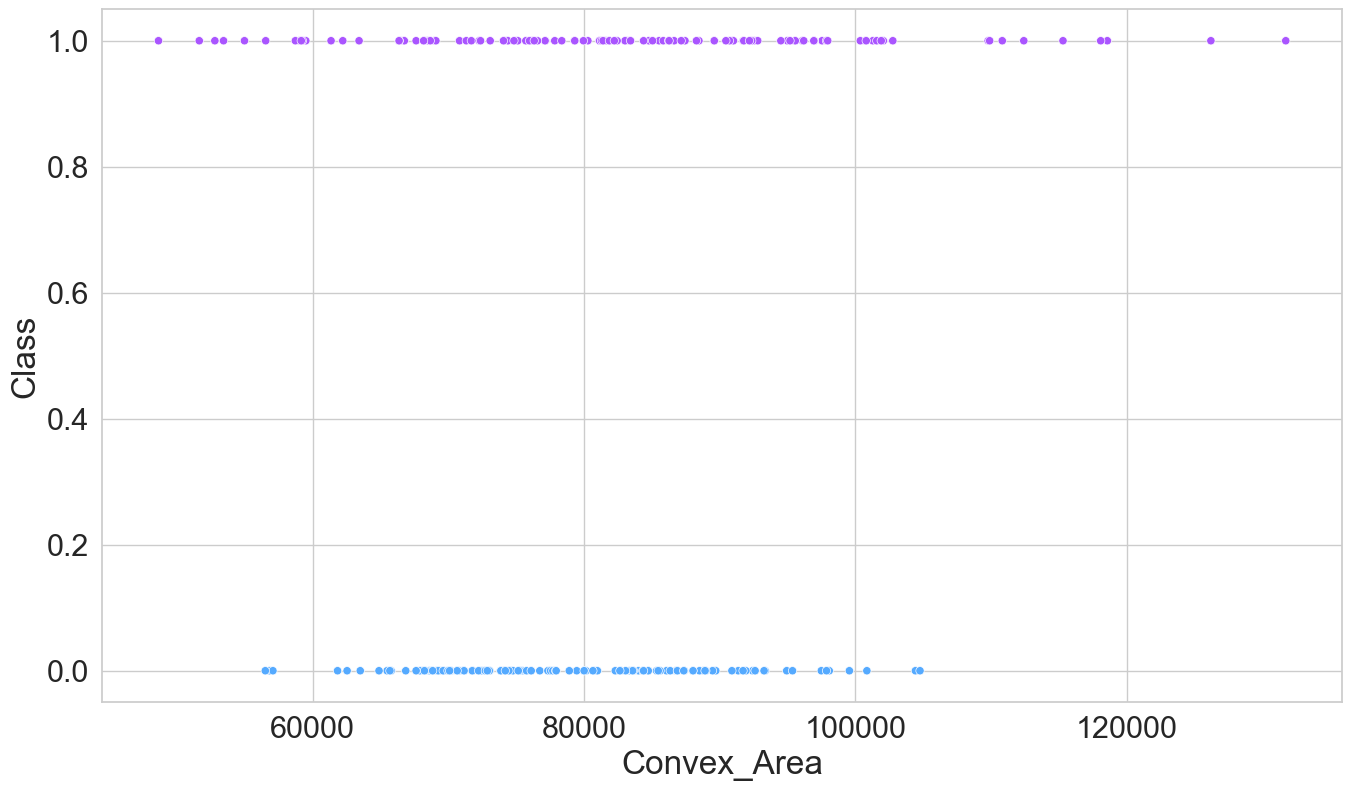

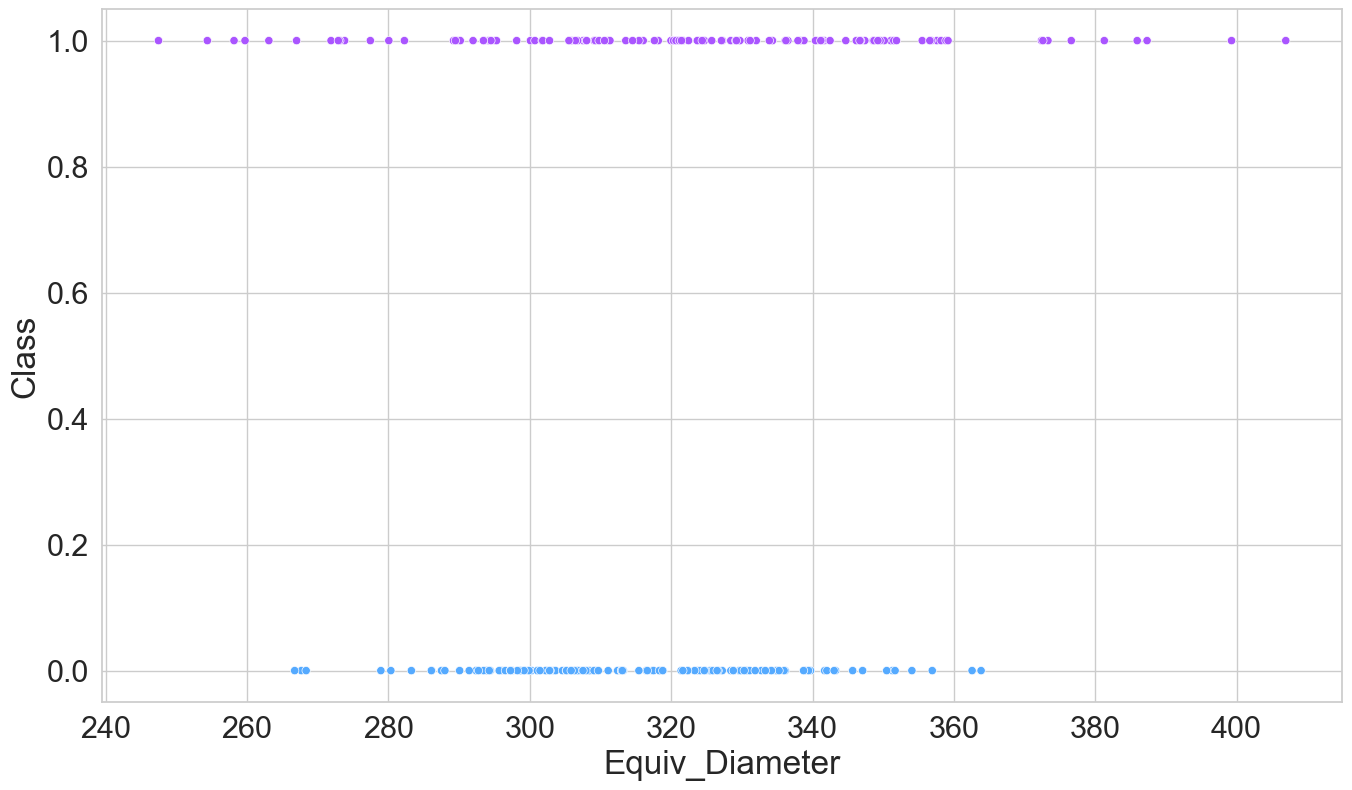

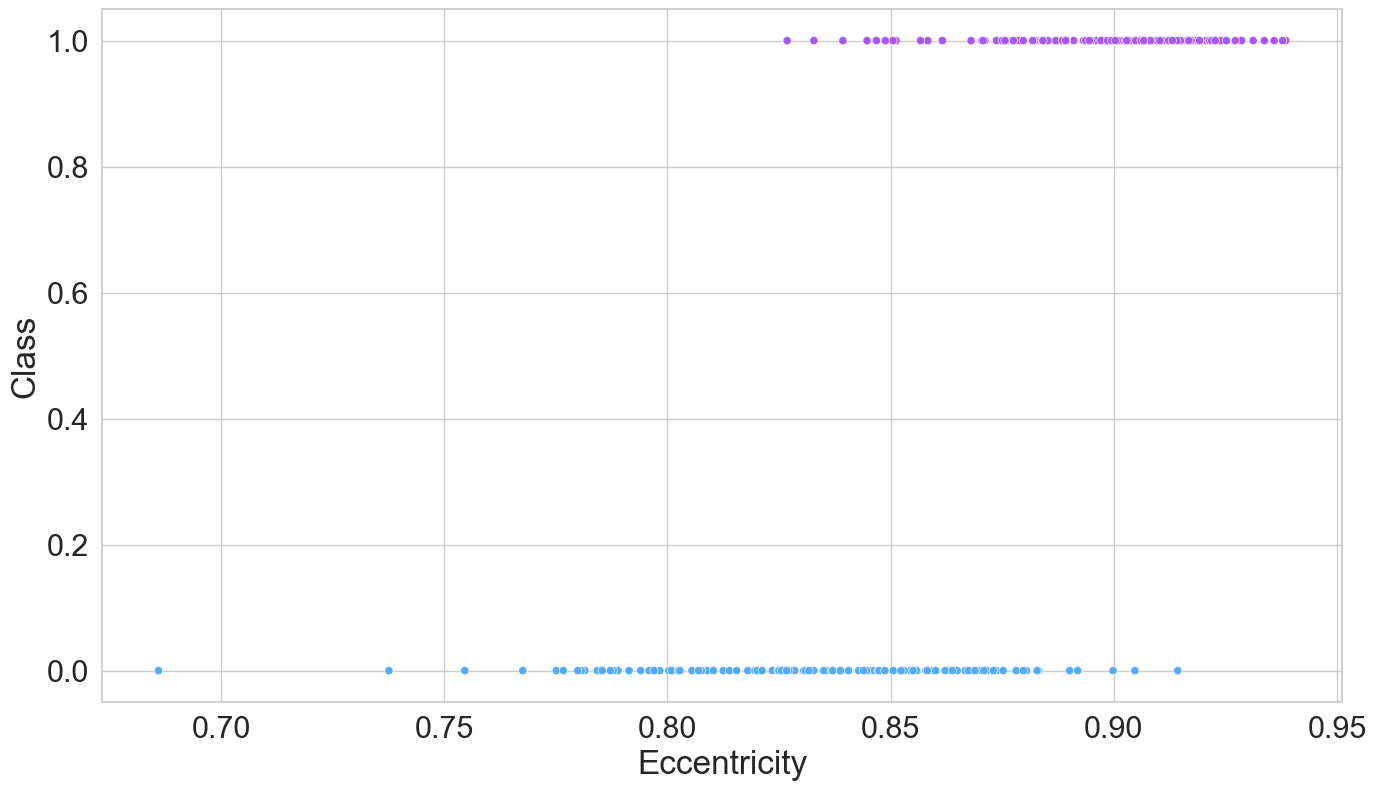

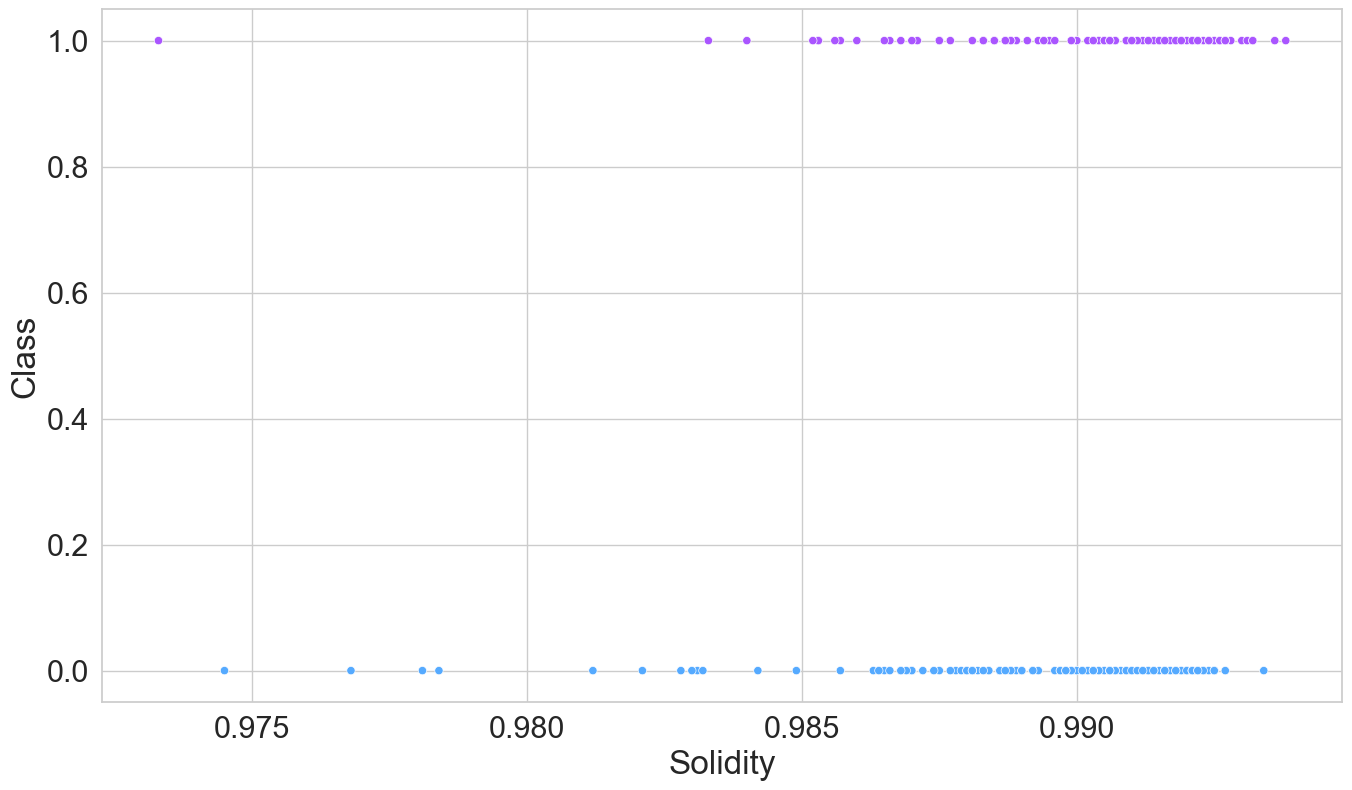

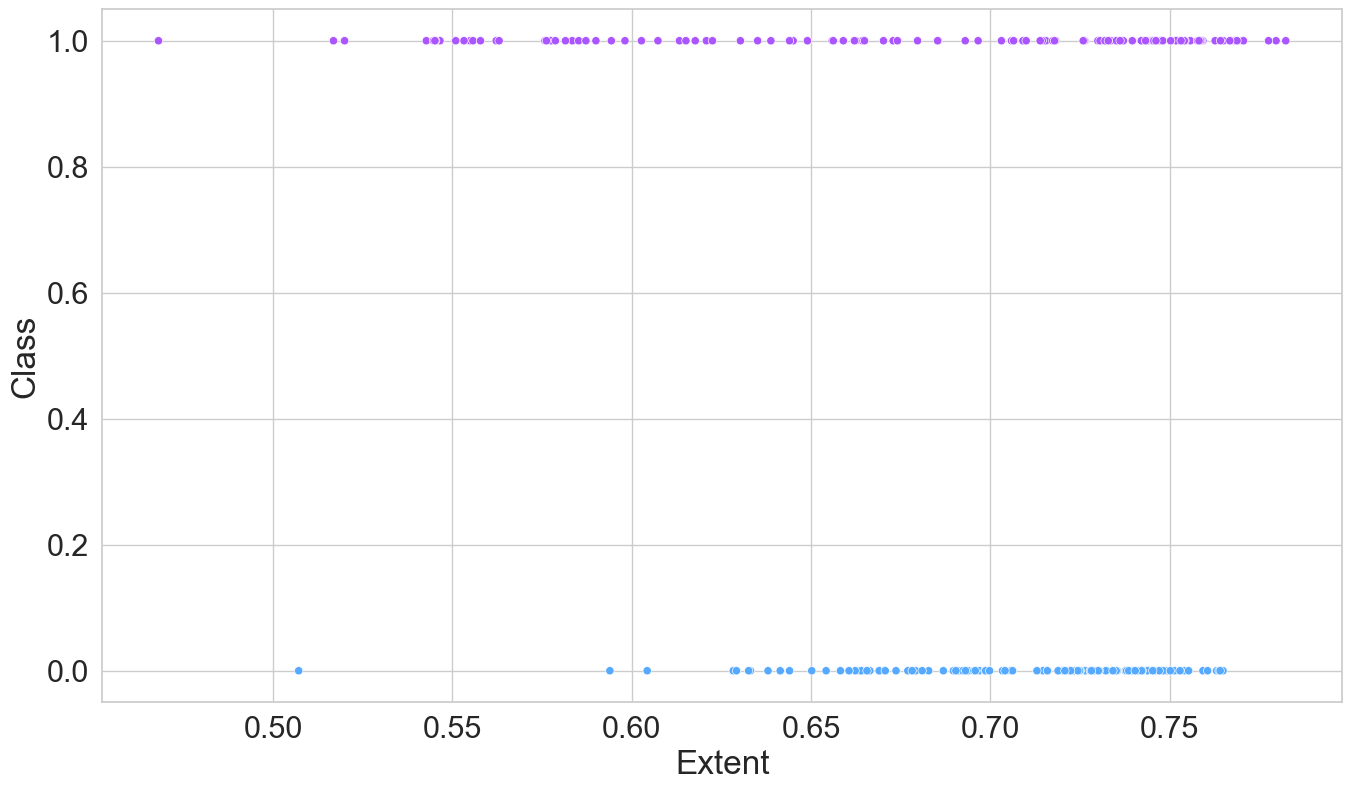

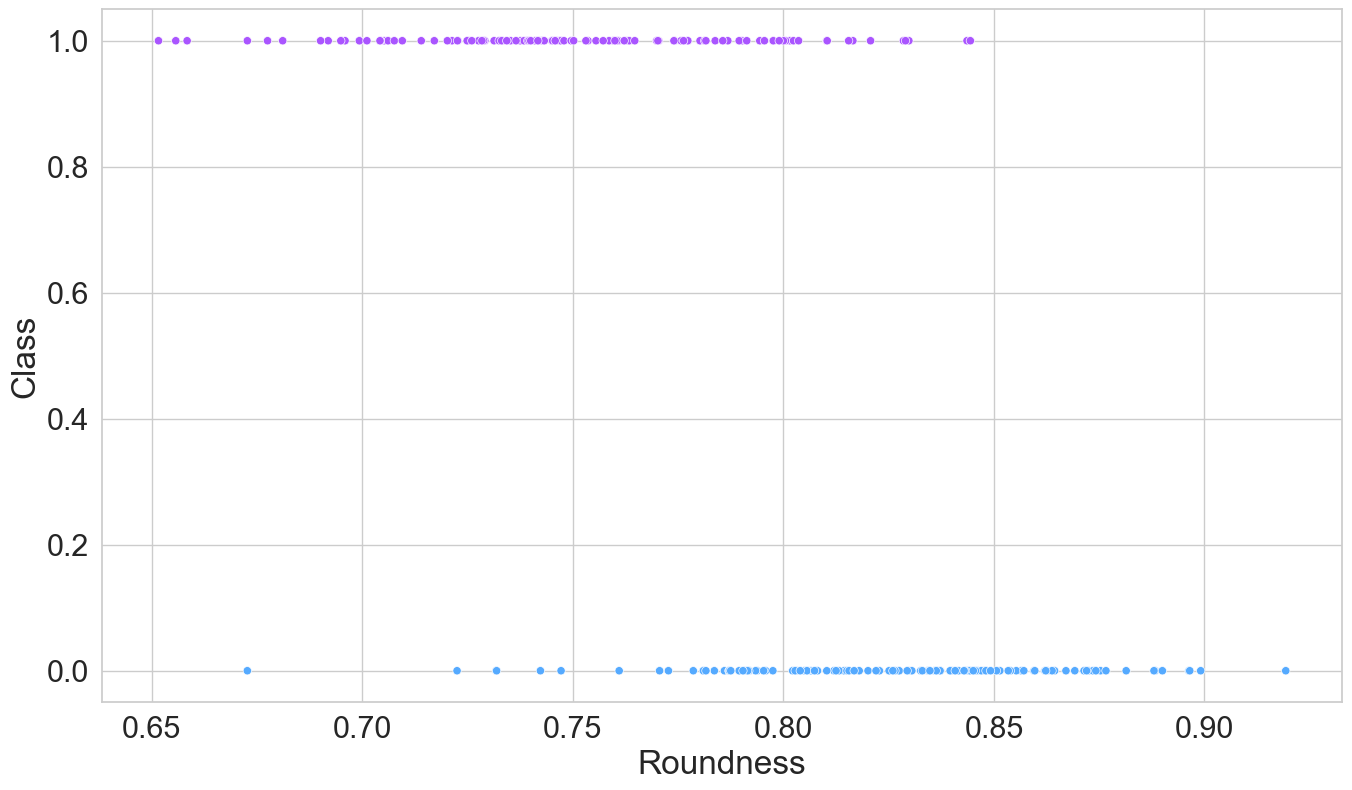

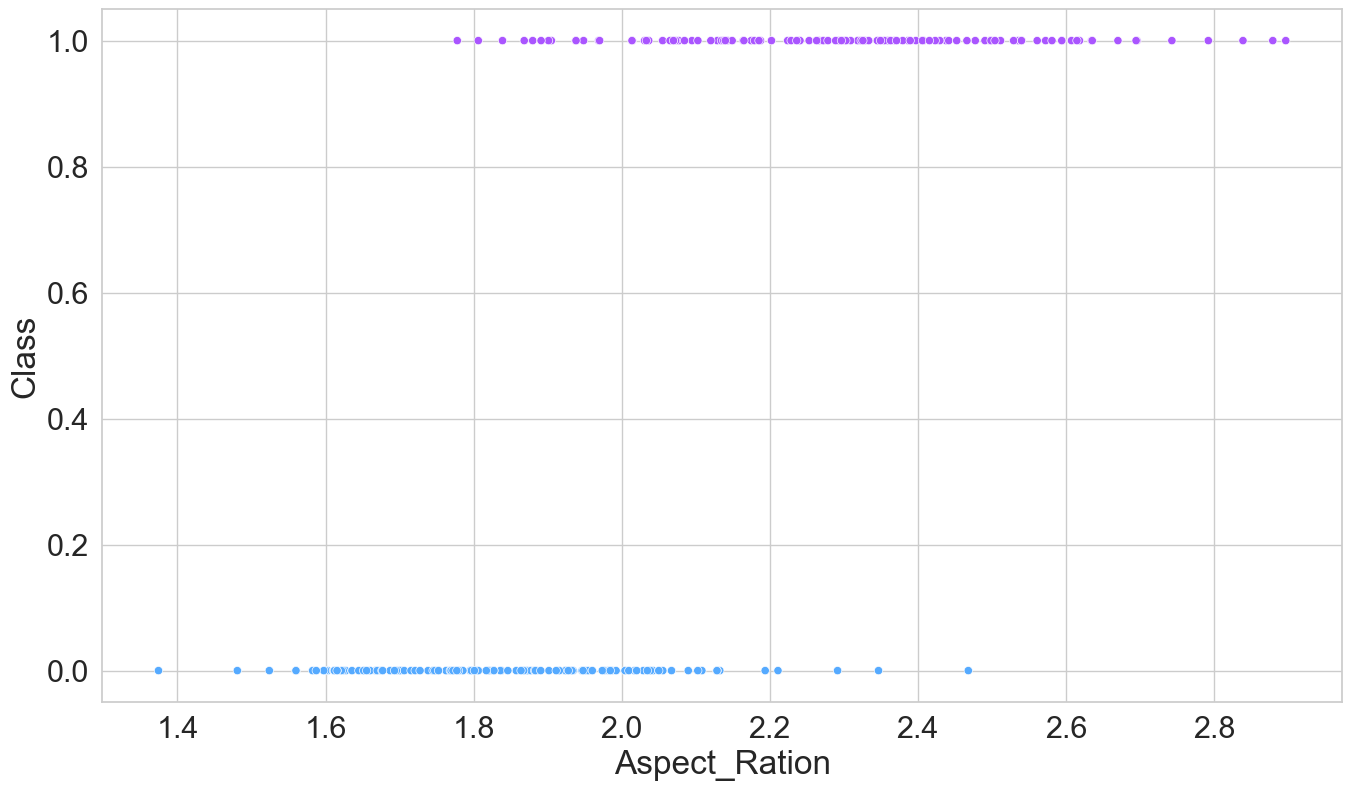

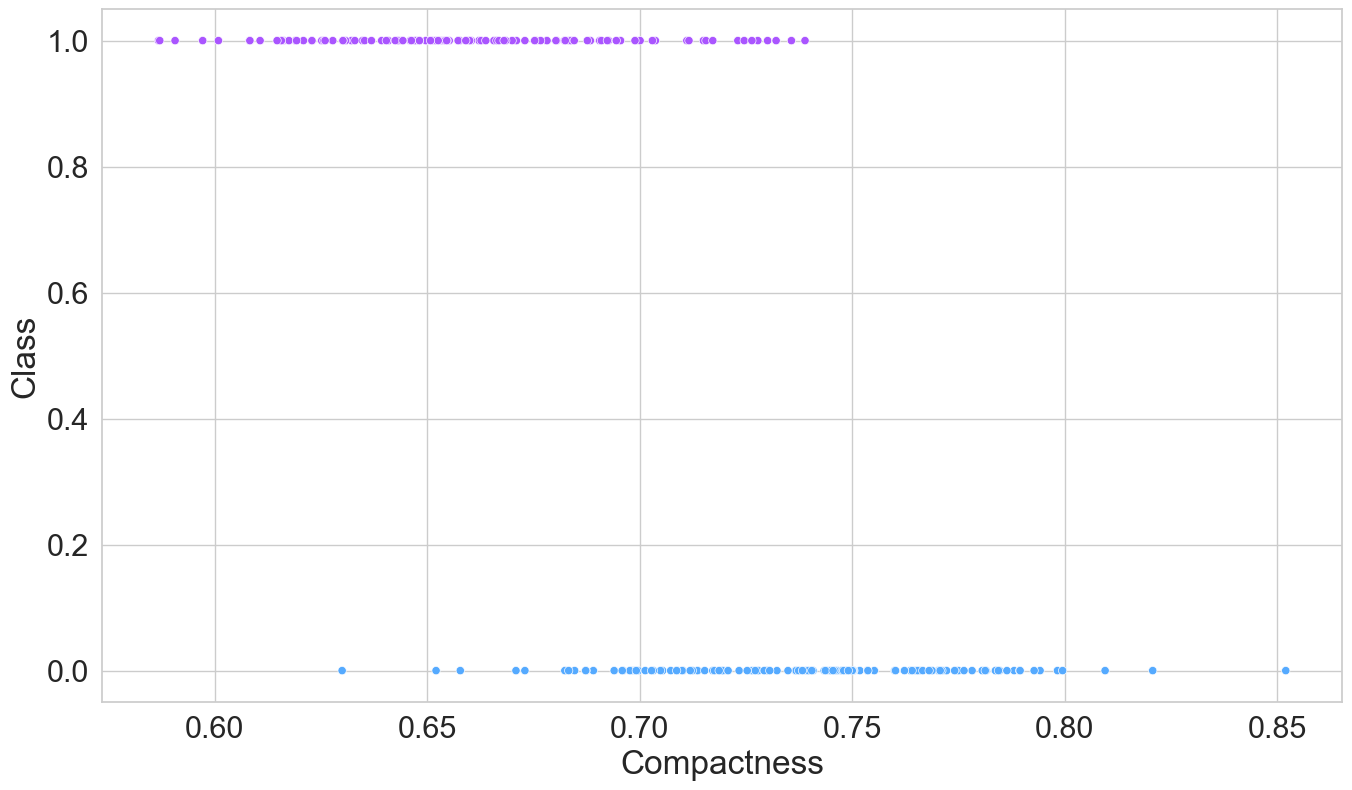

In [13]:
sns.set(font_scale=2)
sns.set_style('whitegrid')

# ignore the last element
for c in sample_df.columns[:-1]:
    plt.figure(figsize=(16,9))
    sns.scatterplot(data=sample_df, x=c, y=seed_data.Class, \
                    hue=seed_data.Class,\
                   palette='cool', legend=False)

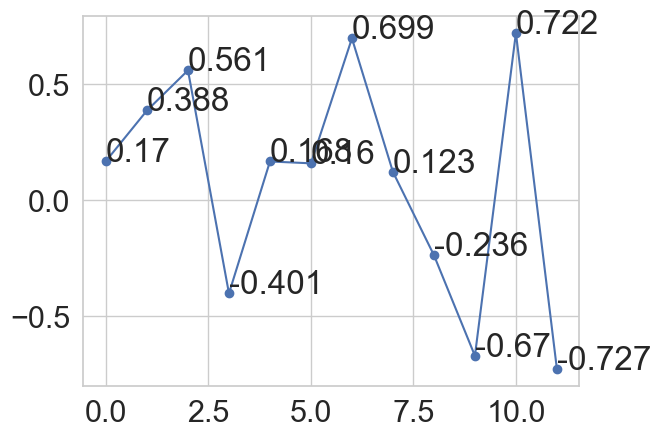

In [14]:
correlation = []
for feature in seed_data.columns[:-1]:
    correlation.append(round(seed_data.Class.corr(seed_data[feature]), 3))
plt.plot(list(range(len(correlation))), correlation, marker = 'o')
for a, b in zip(list(range(len(correlation))), correlation):
    plt.text(a, b, str(b))

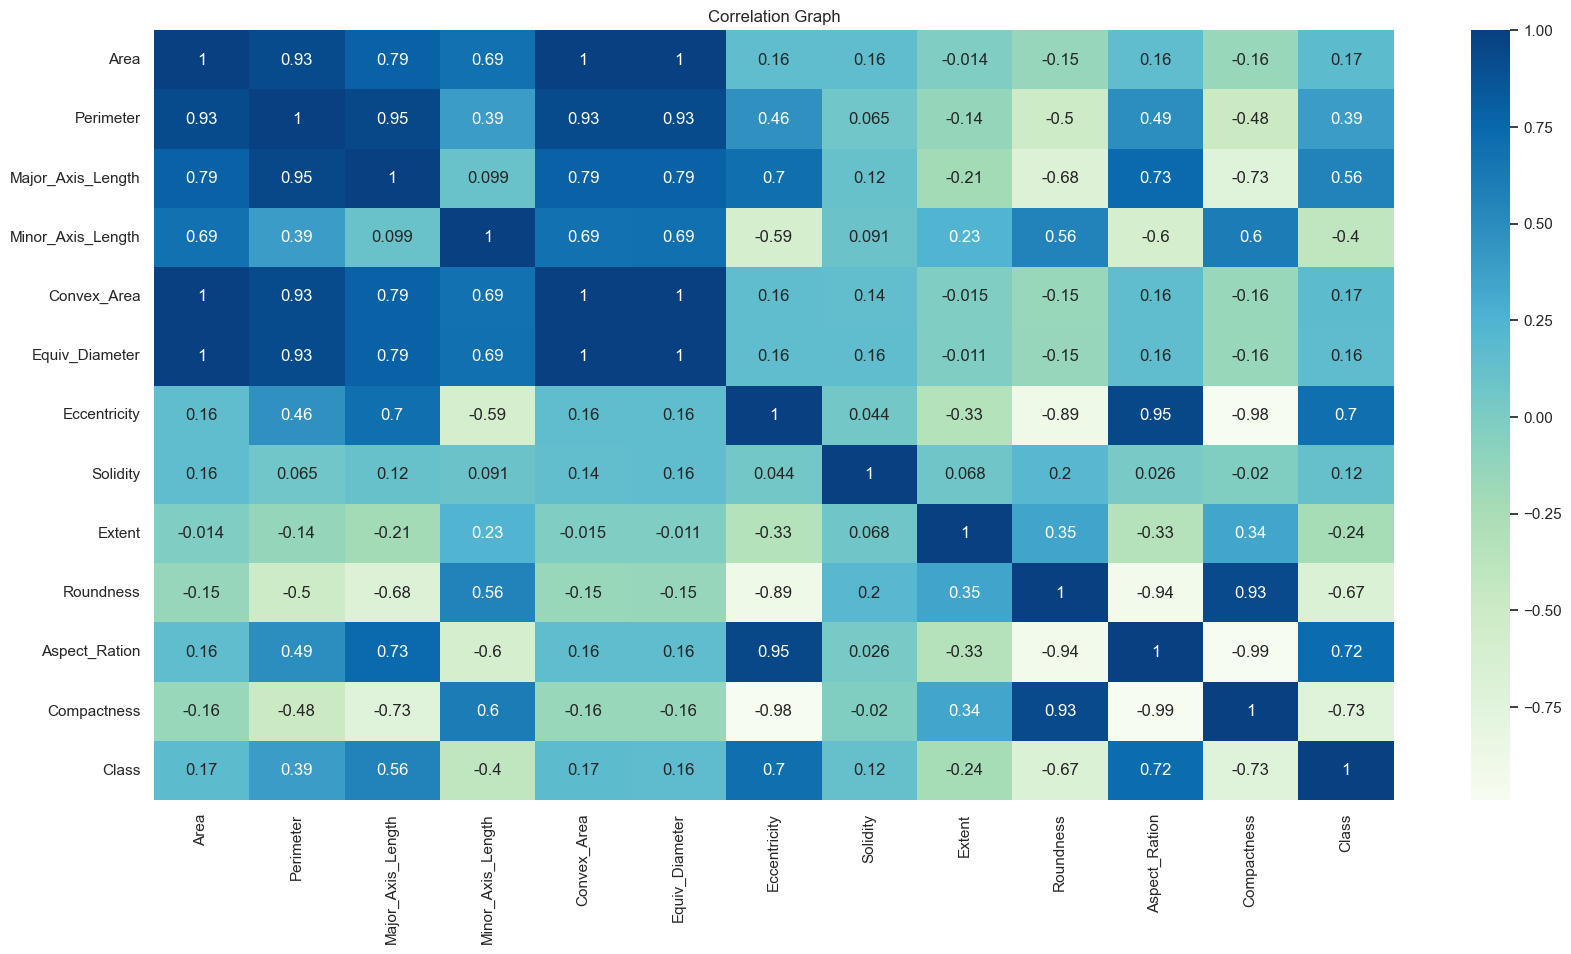

In [15]:
sns.set()
plt.figure(figsize = (20,10))
sns.heatmap(seed_data.corr(), cmap='GnBu', annot=True)
plt.title('Correlation Graph')
plt.show()

<Axes: >

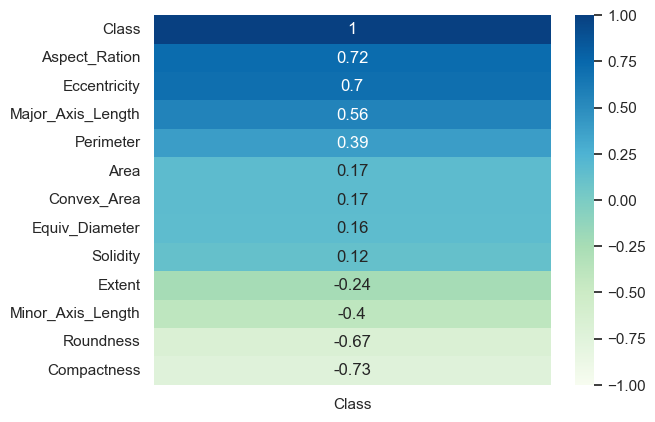

In [16]:
# Plotting the heatmap to check the correlation between the Target Label and other features
sns.heatmap(seed_data.corr()[['Class']].sort_values\
            (by='Class', ascending=False), vmin=-1, vmax=1, annot=True, cmap='GnBu')

C:\Users\smbtk\AppData\Local\Temp\ipykernel_35676\388504628.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  seed_data.hist(ax = ax)


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'Major_Axis_Length'}>,
        <Axes: title={'center': 'Minor_Axis_Length'}>],
       [<Axes: title={'center': 'Convex_Area'}>,
        <Axes: title={'center': 'Equiv_Diameter'}>,
        <Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'Solidity'}>],
       [<Axes: title={'center': 'Extent'}>,
        <Axes: title={'center': 'Roundness'}>,
        <Axes: title={'center': 'Aspect_Ration'}>,
        <Axes: title={'center': 'Compactness'}>],
       [<Axes: title={'center': 'Class'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

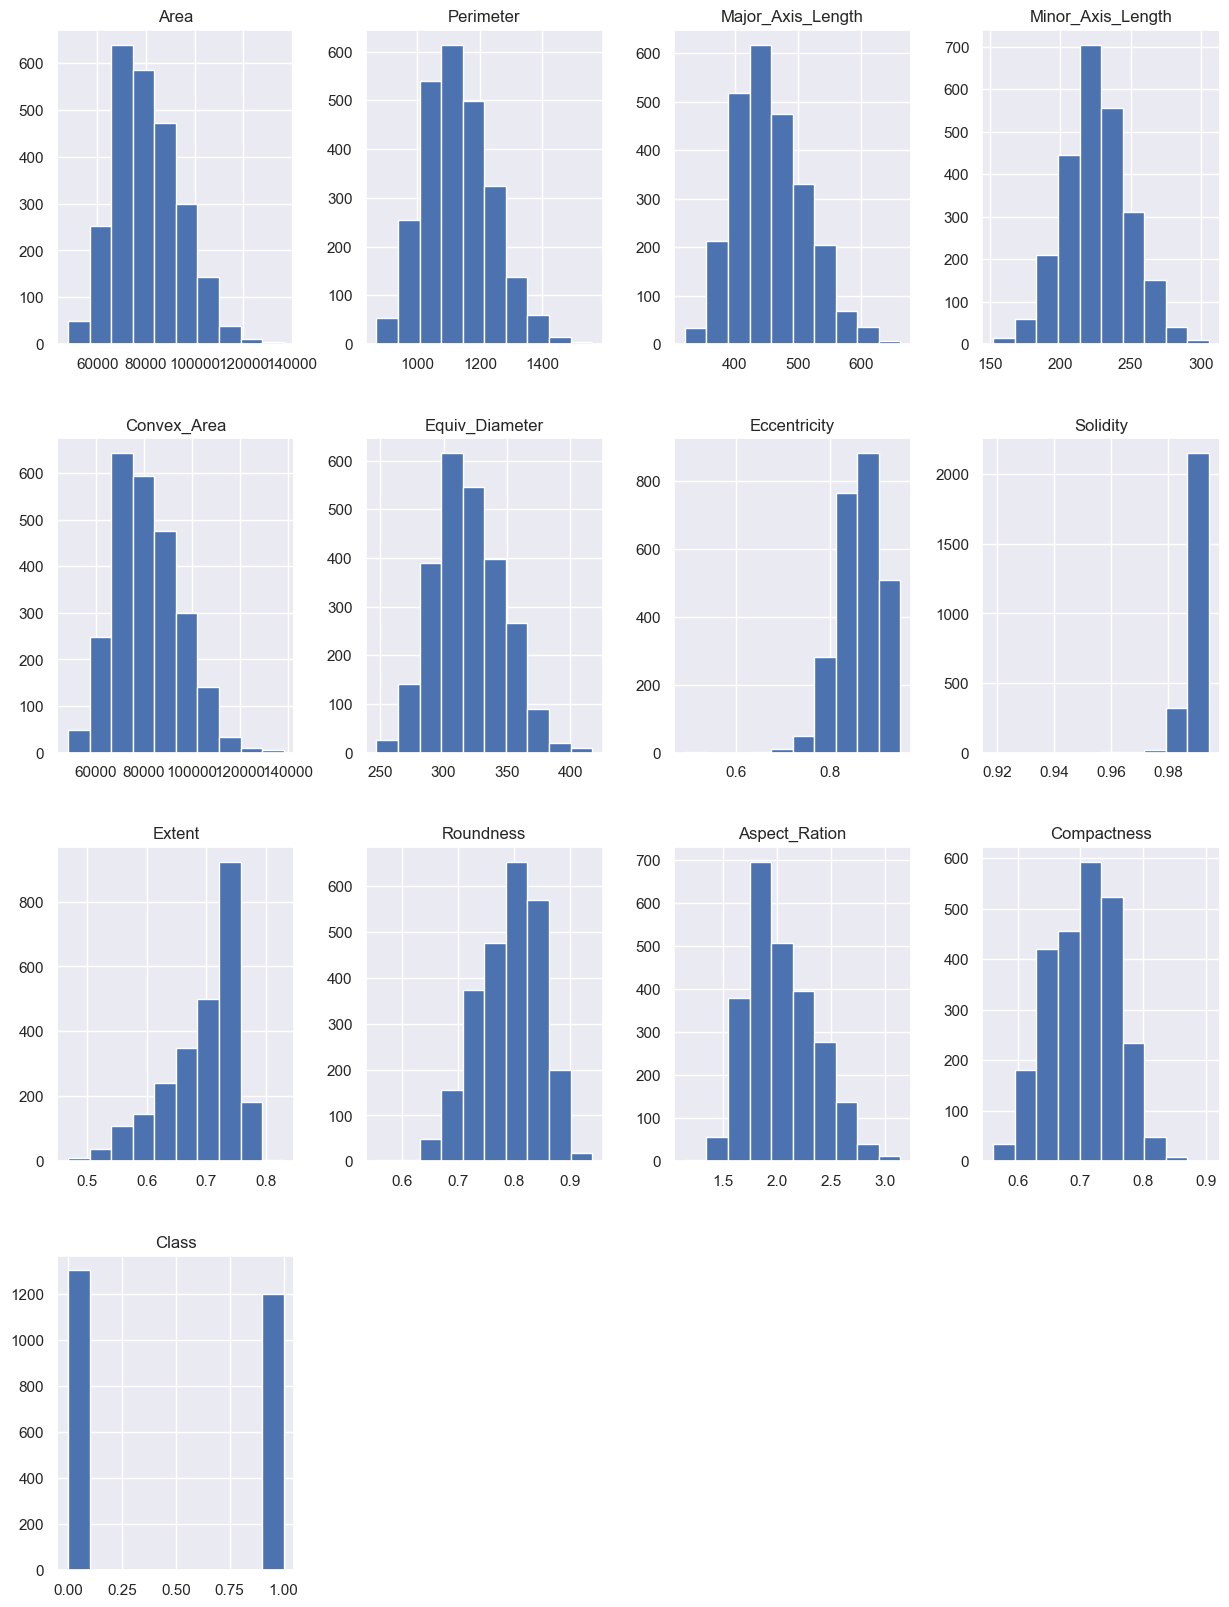

In [17]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
seed_data.hist(ax = ax)

#### Preparing Data for model training and testing
- What is a reasonable partition of my data?
- Should I consider all the predictors for training my model?
- How should I prepare my data for the easy processing?

In [18]:
X = seed_data.drop(['Class'], axis = 1)
y = seed_data.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
y_train.value_counts()

0    1049
1     951
Name: Class, dtype: int64

In [20]:
y_test.value_counts()

0    251
1    249
Name: Class, dtype: int64

In [21]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\smbtk\AppData\Local\Temp\ipykernel_35676\3925800980.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X_train.hist(ax = ax)


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'Major_Axis_Length'}>],
       [<Axes: title={'center': 'Minor_Axis_Length'}>,
        <Axes: title={'center': 'Convex_Area'}>,
        <Axes: title={'center': 'Equiv_Diameter'}>],
       [<Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'Solidity'}>,
        <Axes: title={'center': 'Extent'}>],
       [<Axes: title={'center': 'Roundness'}>,
        <Axes: title={'center': 'Aspect_Ration'}>,
        <Axes: title={'center': 'Compactness'}>]], dtype=object)

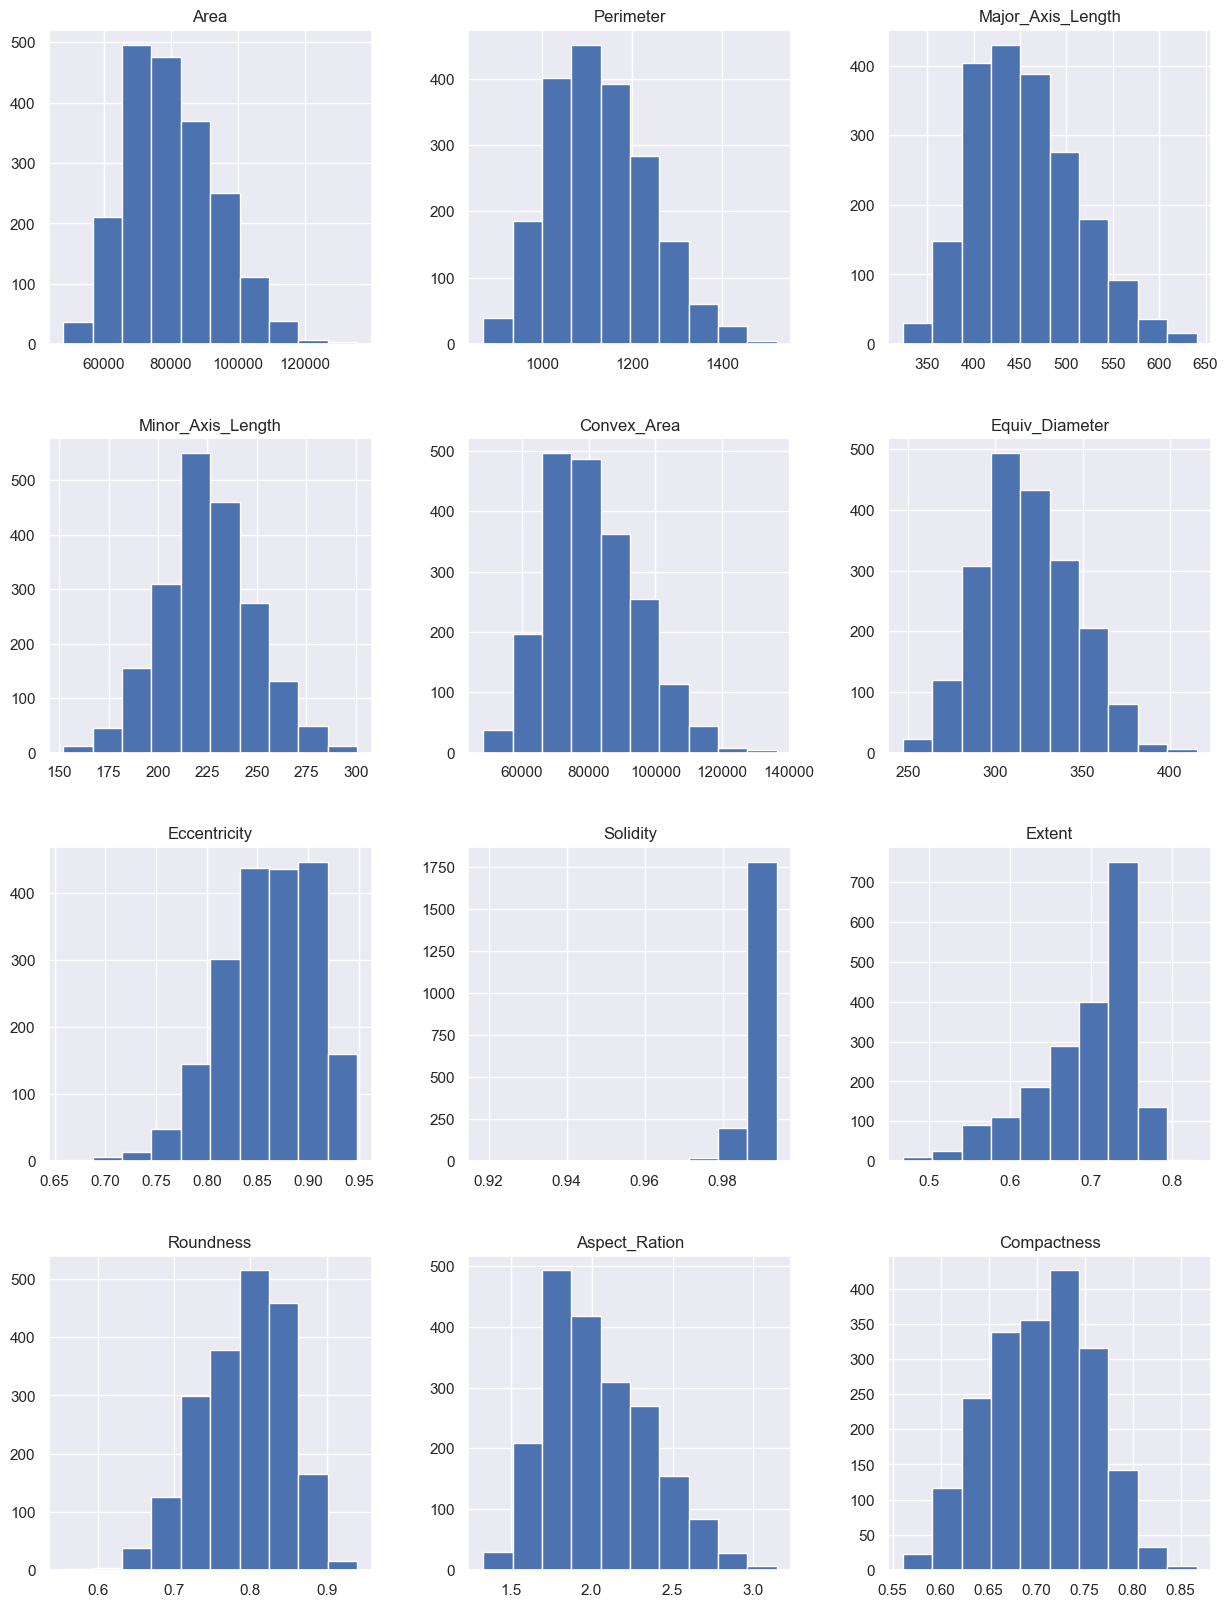

In [22]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
X_train.hist(ax = ax)

C:\Users\smbtk\AppData\Local\Temp\ipykernel_35676\3190014909.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X_train_scaled_pd.hist(ax = ax)


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>],
       [<Axes: title={'center': '9'}>, <Axes: title={'center': '10'}>,
        <Axes: title={'center': '11'}>]], dtype=object)

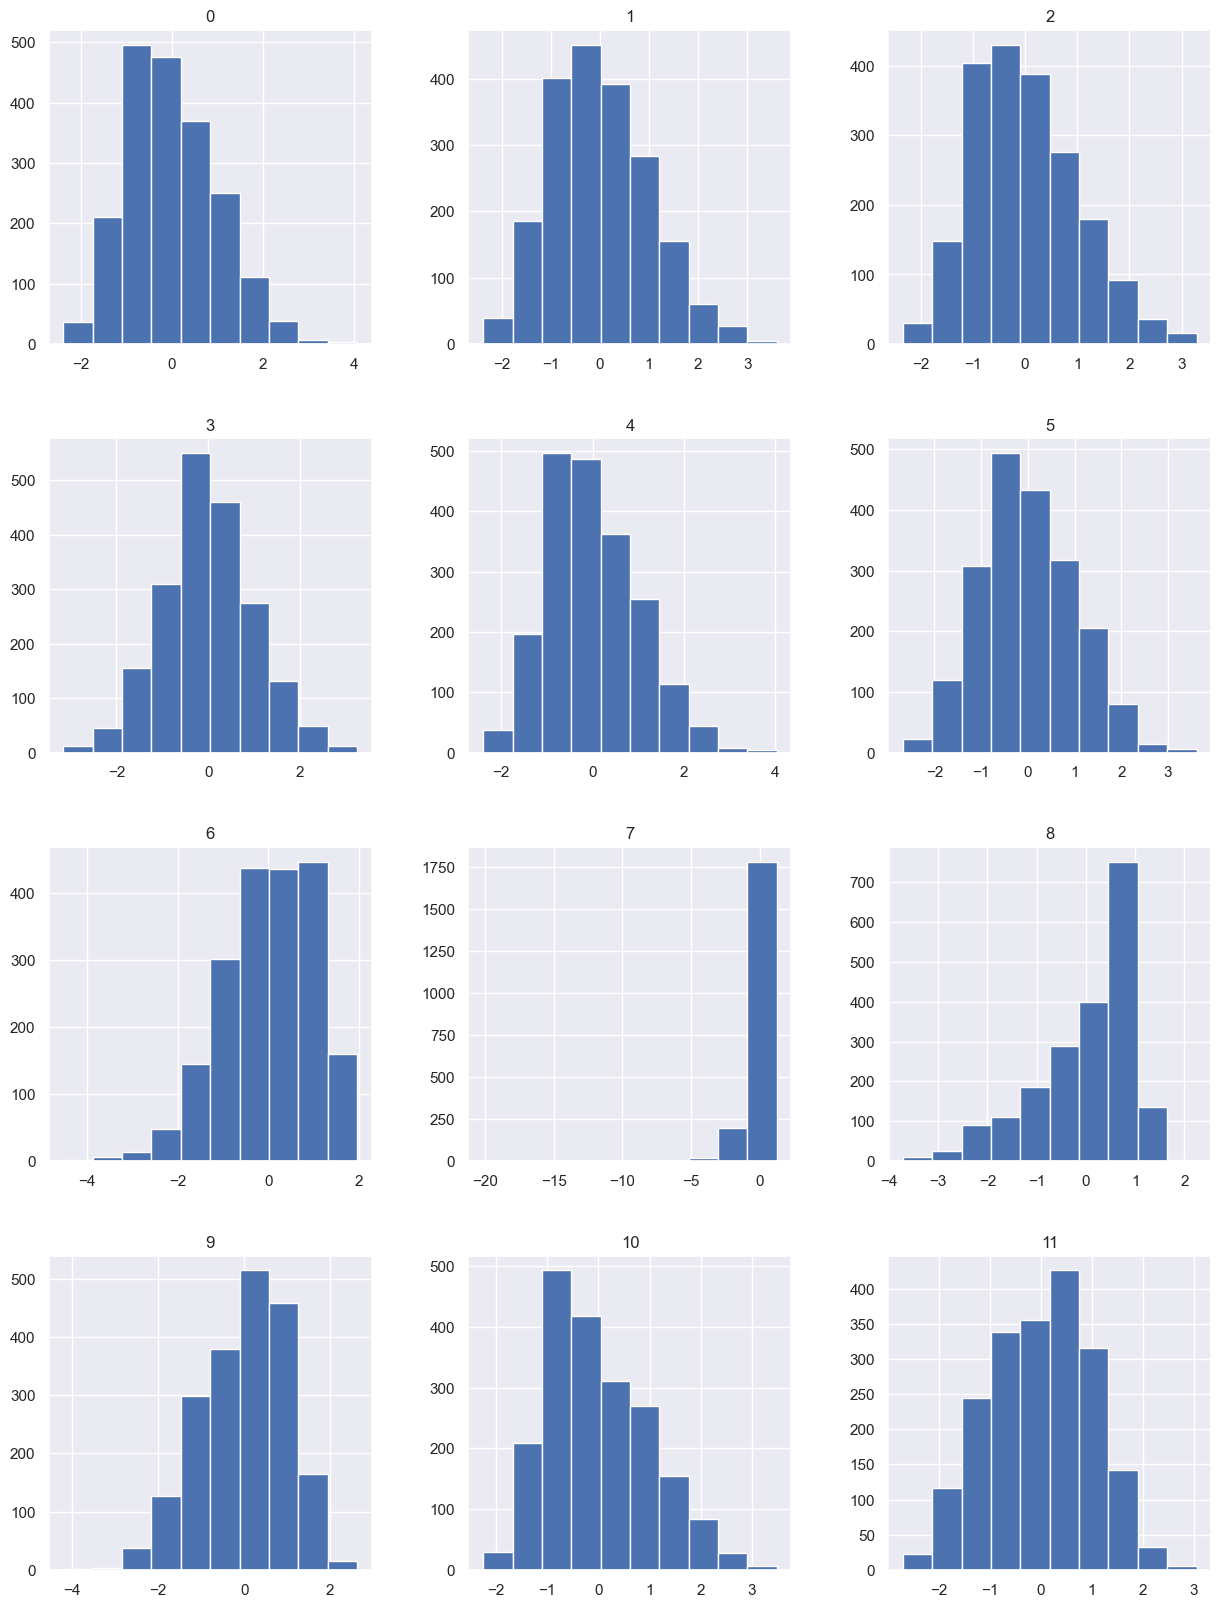

In [23]:
X_train_scaled_pd = pd.DataFrame(X_train_scaled)
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
X_train_scaled_pd.hist(ax = ax)

#### Model Creation and Training

In [24]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y = y_train)

KNeighborsClassifier()

#### Model Evaluation

In [25]:
train_preds = knn.predict(X=X_train_scaled)
test_preds = knn.predict(X=X_test_scaled)

In [26]:
train_preds[0:5]

array([1, 1, 1, 1, 0])

In [27]:
y_train[0:5]

2055    1
1961    1
1864    1
2326    1
461     0
Name: Class, dtype: int32

In [28]:
test_preds[0:5]

array([1, 0, 0, 1, 1])

In [29]:
y_test[0:5]

1447    1
1114    0
1064    0
2287    1
1537    1
Name: Class, dtype: int32

In [30]:
scores = {}
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores['training'] = [round(accuracy_score(y_train, train_preds), 3),\
                     round(precision_score(y_train, train_preds), 3),\
                     round(recall_score(y_train, train_preds), 3),\
                     round(f1_score(y_train, train_preds), 3)]
scores['testing'] = [round(accuracy_score(y_test, test_preds), 3),\
                     round(precision_score(y_test, test_preds), 3),\
                     round(recall_score(y_test, test_preds), 3),\
                     round(f1_score(y_test, test_preds), 3)]
scores_df = pd.DataFrame(scores, index=metrics)
scores_df

,training,testing
Accuracy,0.908,0.854
Precision,0.923,0.873
Recall,0.881,0.827
F1-Score,0.902,0.849


#### Questions to consider ....
- Is my current choice of metric suitable for my problem?
- What other choices do I have?
- Is my model good enough?
- How can I improve its performance?
- What are the different ways to evaluate it?

In [31]:
# classification report
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       251
           1       0.87      0.83      0.85       249

    accuracy                           0.85       500
   macro avg       0.86      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



In [32]:
# k-fold cross-validation
from sklearn.model_selection import KFold, cross_val_score
X_scaled = scaler.transform(X)
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
cv_scores = cross_val_score(estimator=knn, X=X, y=y, cv=kfold)

In [33]:
cv_scores

array([0.628, 0.656, 0.644, 0.64 , 0.672, 0.632, 0.704, 0.62 , 0.648,
       0.672])

In [34]:
cv_scores.mean()

0.6516

In [35]:
cv_scores.std()

0.023963305281200248

In [36]:
# running multiple models to find a suitable one
estimators = {'KNeighborsClassifier': knn,\
              'SVC': SVC(kernel='linear'), 'DecisionTreeClassifier': DecisionTreeClassifier()}
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    cv_scores = cross_val_score(estimator=estimator_object, X=X, y=y, cv=kfold)
    print(f'{estimator_name:>20}: mean accuracy={cv_scores.mean():.2%}; standard deviation={cv_scores.std():.2%}')

KNeighborsClassifier: mean accuracy=65.16%; standard deviation=2.40%
                 SVC: mean accuracy=87.44%; standard deviation=2.59%
DecisionTreeClassifier: mean accuracy=84.32%; standard deviation=1.57%


#### Hyperparameter Tuning

In [37]:
for k in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(estimator=knn, X=X, y=y, cv=kfold)
    print(f'k={k:<2}: mean accuracy={cv_scores.mean():.2%}; standard deviation={cv_scores.std():.2%}')

k=1 : mean accuracy=69.16%; standard deviation=2.68%
k=3 : mean accuracy=67.00%; standard deviation=2.73%
k=5 : mean accuracy=65.16%; standard deviation=2.40%
k=7 : mean accuracy=64.96%; standard deviation=3.09%
k=9 : mean accuracy=64.60%; standard deviation=3.48%
k=11: mean accuracy=62.92%; standard deviation=3.72%
k=13: mean accuracy=61.72%; standard deviation=4.04%
k=15: mean accuracy=61.16%; standard deviation=3.35%
k=17: mean accuracy=61.56%; standard deviation=2.79%
k=19: mean accuracy=60.80%; standard deviation=2.79%


In [38]:
estimators = {'KNeighborsClassifier': knn,\
              'SVC': SVC(kernel='linear'), 'DecisionTreeClassifier': DecisionTreeClassifier()}
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    cv_scores = cross_val_score(estimator=estimator_object, X=X_scaled, y=y, cv=kfold)
    print(f'{estimator_name:>20}: mean accuracy={cv_scores.mean():.2%}; standard deviation={cv_scores.std():.2%}')

KNeighborsClassifier: mean accuracy=88.00%; standard deviation=2.44%
                 SVC: mean accuracy=87.92%; standard deviation=2.32%
DecisionTreeClassifier: mean accuracy=84.44%; standard deviation=1.75%


In [39]:
for k in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(estimator=knn, X=X_scaled, y=y, cv=kfold)
    print(f'k={k:<2}: mean accuracy={cv_scores.mean():.2%}; standard deviation={cv_scores.std():.2%}')

k=1 : mean accuracy=83.52%; standard deviation=2.82%
k=3 : mean accuracy=85.96%; standard deviation=2.18%
k=5 : mean accuracy=87.08%; standard deviation=2.33%
k=7 : mean accuracy=87.92%; standard deviation=1.80%
k=9 : mean accuracy=88.08%; standard deviation=2.37%
k=11: mean accuracy=88.28%; standard deviation=2.19%
k=13: mean accuracy=88.48%; standard deviation=2.52%
k=15: mean accuracy=88.28%; standard deviation=2.49%
k=17: mean accuracy=88.28%; standard deviation=2.39%
k=19: mean accuracy=88.00%; standard deviation=2.44%


#### What is the take-home message?